# Affinidi Vault - Custodial Wallet

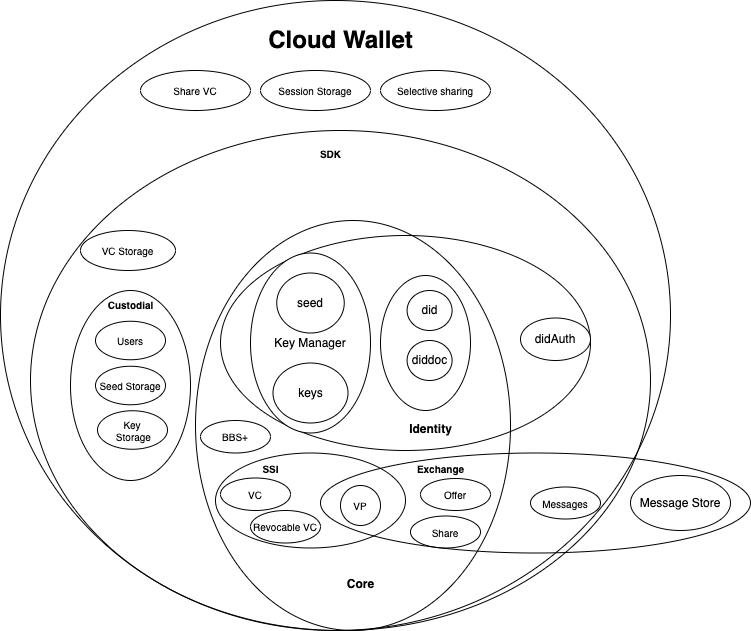

# User Managment + Seed Storage

## User Managment
Cognito based solution that offer OTP and passwordless ligin / signup flow together with a classical passwords
User managment avaliable as independent module and could be used to build user managment solutions [user managment](https://github.com/affinityproject/affinidi-core-sdk/tree/master/common-libs/user-management)
                                                                                                                    
                                                                                                                    


In [19]:
const plantumlEncoder = require('plantuml-encoder')
const tslab = require("tslab");
const map = plantumlEncoder.encode(`
@startmindmap
+ Key Storage + User managment
++ User managment
+++ email
++++ password-less
+++++ sign Up
++++++ sign Up confirm otp
+++++ login
++++++ login confirm otp
+++++ signIn = signUp + login
++++++ confirm otp
++++ password
+++++ sign Up
++++++ sign Up confirm
+++++ login
++++++ confirm
+++++ forgot password
++++++ confirm
+++++ change passwrord
++++ change user name
+++++ confirm
+++ phone
++++ password-less
+++++ sign Up
++++++ sign Up confirm
+++++ login
++++++ login confirm
+++++ signIn = signUp + login
++++++ confirm otp
++++ password
+++++ sign Up
++++++ sign Up confirm otp
+++++ login
+++++ forgot password
++++++ confirm
+++++ change passwrord
++++ change user name
+++++ confirm
+++ username
++++ password
+++++ sign Up
++++++ sign Up confirm
+++++ login


-- Key Storage
--- store my key
--- get my key
-- Seed Storage
--- store my seed
--- get my seed
@endmindmap
`);
const urlMap = 'http://www.plantuml.com/plantuml/svg/' + map
tslab.display.html(`<img src="${urlMap}"/>`)


## Flow


In [18]:
const flow = plantumlEncoder.encode(`
@startuml
title Affinidi: Wallet Storage

actor  "SDK (client)" as client
participant  "AWS Cognito" as cognito
database "key Storage" as keystore
participant  "Enciption Key Provider" as keyprovider
==  **1. Store Keys** ==
client -> cognito: signup (login, password)
alt login is email or phone
cognito --> client: verification request sms/email
client -> cognito: confirm verification

end
cognito --> client: 200 [accessToken]
client -> keyprovider: generate secret key(accessToken2)
keyprovider --> client: 200[encryptionKey]
note across: Using encryptionKey encrypt seed
client -> keystore: storeMyKey(accessToken1, encryptedSeed)
keystore --> client: 200
note across: Pull and store VC auth based on the signature challenge, other words user proving that he own key(publicKey/did).

== **2. Pull Keys** ==
client -> cognito: login (login, password)
cognito --> client: 200 [accessToken]

client -> keystore: readMyKey(accessToken1)
keystore --> client: 200 [encryptedSeed]

client -> keyprovider: ---(accessToken2)
keyprovider --> client: 200 [encryptionKey]

note across: On Client side encryptedSeed decrypting using encryptionKey, and client then able do all privateKey related operations

@enduml
`);
const urlFlow = 'http://www.plantuml.com/plantuml/svg/' + flow
tslab.display.html(`<img src="${urlFlow}"/>`)

<img src="http://www.plantuml.com/plantuml/svg/ZLJ1RXen5BpxAqQSO0KauOX4b8ZsXAf6ecqEA0TZFnOhnjxQNYB-lc-zeB90gvpsUVrc_3mpk-8f9XbIlRCYcMG9pvkDSKQRALwbjPImJ3x8aeIGYYkWj_ooG5zPGouDUf0HRIqgvZ7ALD8bxdf-NMBkIsUIRvlQMcYPv5f6Gk-T3YVotC7ho4kw8Fhgk4p6EomOy1BytcWA9qHrN8lP32YAXt6cfAOt5WLcCz5EXz7ZQOGfeYbTNQ5lVMdS49MCySC7FH3I9kINC16qayQ2hrnjlIDnH6FKC6NEAVOKpCOecSSBzBkcc11tyIvZRnsjlDkOiEiWXI2dR_9Fxk-naafHZ3_yExctCygpoqzHagCW4o6I2cmQR_RFS9E1E6k_F695JeL3rfXbUnFECv5KmSSunSzeN8bEnsd5Xv7kJfGDP86RnxV3eZl5m_249BraQ1ugjrvEr1tXfROMqkcM5h_ca7NQeacH1WkVjfGjbQdcRRLjSkjA6iBpJa1ZRKGTkSmAy7NILYOmod-uB5LLhwrHFEwTDdem5asQYc8oRe_-RvRQk5n7wNDstbGlaDJNulrRBQmwibwo_at9Q3JwV2fm6OkkATyTvkqfaT5TOw6fHRBKzNL-XjdCuuniaODSyvz7Ux1px97PSvARd0MoNB77LHDk1aSXdlXRQVvMVm00"/>

## Sign In = SingUp + login

In [24]:
const { createWallet } = require('@affinidi/wallet-node-sdk')
const walletFactory = createWallet('AffinityCore')

Lets setup wallets

In [25]:
const accessApiKey = '<your key>'

In [26]:
const options = {
    env: 'prod',
    accessApiKey:accessApiKey,
}

In [35]:
const email = 'pavlyshyn+user-demo@gmail.com'
const loginToken = await walletFactory.initiateSignInPasswordless(options,email)
loginToken

{"signInType":"logIn","logInToken":"{\"ChallengeName\":\"CUSTOM_CHALLENGE\",\"Session\":\"AYABeEL8ZwjKHEw9Ry7Gj8za0QEAHQABAAdTZXJ2aWNlABBDb2duaXRvVXNlclBvb2xzAAEAB2F3cy1rbXMAUGFybjphd3M6a21zOmFwLXNvdXRoZWFzdC0xOjAzMTU3NzI0MDA0ODprZXkvYmEwNzA1YzktMTI0Mi00ODg1LWJhMmYtNDhiMWNjYTNiNDNmALgBAgEAeMtRirmB1qptVeI5EWSyPpLL6RXz-VVK9JVsLMBfSNNmAV_3ml5iLryQAWVahwO2YXcAAAB-MHwGCSqGSIb3DQEHBqBvMG0CAQAwaAYJKoZIhvcNAQcBMB4GCWCGSAFlAwQBLjARBAwKDwpsUuxd-Ff83I8CARCAO_apJS06v7PdOoiF4GX-1pgBjwRFyj_dnZw4Ut6WVqckdqVSUhwhZdaok9pNnpnoP89NN08RFzopLMnpAgAAAAAMAAAQAAAAAAAAAAAAAAAAAG7IdNkzpOwjzzGIvNgxSf3_____AAAAAQAAAAAAAAAAAAAAAQAAARCAK3MiBzvSXJW8_PjtKl6xE5mf-mYV3DzN31I-iOZ05qGDZJcY-XR6y_GMGpOHY-HcJVccKp9T2mAmfkx55NyXs_NO5XqbeQ3sf8RIKW5OoeFUMZZmRz7MWlmK1JMiaiHHwiArMNq8_lFI-16_ePP9xTPR_79GxAtaHa05VlBFiw1lByA9hFQKkTzVW3L0cqQGgq85HOl82M7RpnPLoolAa6hrstRis0A2utV-RDJnoJbhBzCwa8kKtGCq_TPQylYciTZeJVnu6FJzWmJNb0Ouxc7bRY2th1GNKSY9CiNfl8Su7-Hc36T54wFwbRZ6i4i6HVEjqwmY4YDBXFGrF2R415AbE4svWBGMenmysSrh8F-EsST5CdmBOfTNPTyj_-8\",

In [37]:
const otp = '317187'

In [38]:
const result = await walletFactory.completeSignInPasswordless(options, loginToken, otp)
result.wallet.did

did:elem:EiCb9h4_4xgUdeuaGBe1xwK8SDTWPgPN9D4hIVnufuqKOg;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBeVkyVmpPR1poTjJaaU9XSmtZVFU0WWpGaU5HRXpOV0V5WVRjd01ETTFZV1kyT1RoaU5qVXpZalJsTm1Sa05HWmtaVFF6TTJZd016VmlZelE0TlRaall5SjlMSHNpYVdRaU9pSWpjbVZqYjNabGNua2lMQ0oxYzJGblpTSTZJbkpsWTI5MlpYSjVJaXdpZEhsd1pTSTZJbE5sWTNBeU5UWnJNVlpsY21sbWFXTmhkR2x2Ymt0bGVUSXdNVGdpTENKd2RXSnNhV05MWlhsSVpYZ2lPaUl3TW1WaVpUQTBZV05tT1RSa1lUWTRaV1ZtWXpNeFlUQmlOV0ptWkRBME5XSmhNV1E0TUdRMVpHWm1ZMk5oWVdOaVpXTXhZbVExTm1JNE5qWmlNakJrWVRJaWZWMHNJbUYxZEdobGJuUnBZMkYwYVc5dUlqcGJJaU53Y21sdFlYSjVJbDBzSW1GemMyVnlkR2x2YmsxbGRHaHZaQ0k2V3lJamNISnBiV0Z5ZVNKZGZRIiwic2lnbmF0dXJlI

In [42]:
const doc = await result.wallet.resolveDid(result.wallet.did)
doc
                        

{
  '@context': 'https://w3id.org/security/v2',
  publicKey: [
    {
      id: 'did:elem:EiCb9h4_4xgUdeuaGBe1xwK8SDTWPgPN9D4hIVnufuqKOg#primary',
      usage: 'signing',
      type: 'Secp256k1VerificationKey2018',
      publicKeyHex: '02cec8fa7fb9bda58b1b4a35a2a70035af698b653b4e6dd4fde433f035bc4856cc'
    },
    {
      id: 'did:elem:EiCb9h4_4xgUdeuaGBe1xwK8SDTWPgPN9D4hIVnufuqKOg#recovery',
      usage: 'recovery',
      type: 'Secp256k1VerificationKey2018',
      publicKeyHex: '02ebe04acf94da68eefc31a0b5bfd045ba1d80d5dffccaacbec1bd56b866b20da2'
    }
  ],
  authentication: [ 'did:elem:EiCb9h4_4xgUdeuaGBe1xwK8SDTWPgPN9D4hIVnufuqKOg#primary' ],
  assertionMethod: [ 'did:elem:EiCb9h4_4xgUdeuaGBe1xwK8SDTWPgPN9D4hIVnufuqKOg#primary' ],
  id: 'did:elem:EiCb9h4_4xgUdeuaGBe1xwK8SDTWPgPN9D4hIVnufuqKOg'
}


## Bridges of identities
SDK build a bridge from your web2 identifier to ssi identities
You could build edge wallets on top that integrate biometric identities like fingerprints or face
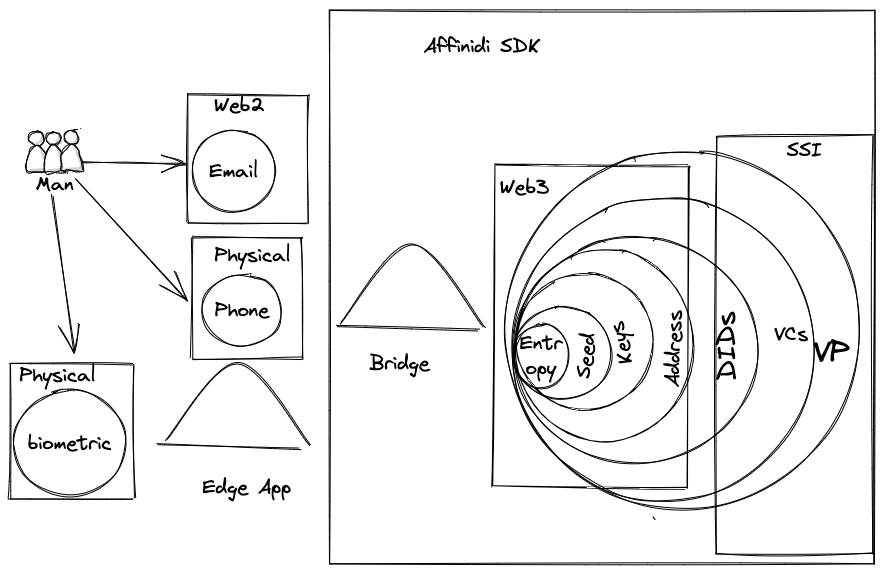